# Comparison of feature extraction methods for Vehicle Detection

By Jaya Sai Karanam,
   Kiruthika Varatharajan,
   Sharanya Reddy Konda.

### Importing required libraries

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import random
import time
import sklearn
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation
from skimage.filters import prewitt_h,prewitt_v
import scipy.misc
from skimage.feature import hog

### Declaring paths for datasets

In [2]:
path=r"C:\Users\Kiruthika\Downloads\OwnCollection"
vehicles = glob.glob(r'C:\Users\Kiruthika\Downloads\OwnCollection\vehicles\far\*')
non_vehicles = glob.glob(r'C:\Users\Kiruthika\Downloads\OwnCollection\non-vehicles\far\*')

### Functions defined for feature extraction methods
Includes:
1. Binary Filter
2. Contouring
3. Prewitt
4. Image Segmentation
5. Histogram of oriented Gradient

In [3]:
def contour_image(img):
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #converting BGR to Gray type image
    ret,thresh = cv2.threshold(imgray,127,255,0)
    contours, image = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
    cimg1 = cv2.drawContours(img, contours, -1, (0,255,0), 3) # for visualization of contour
    cimg2=cimg1.flatten() #flattening the image
    return cimg2
def binary_image(img):
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #converting BGR to Gray type image
    _, binary = cv2.threshold(imgray, 225, 255, cv2.THRESH_BINARY_INV) #
    bimg=binary.flatten()
    return bimg
def prewitt_image(img):
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #converting BGR to Gray type image
    vertical_edges=prewitt_h(imgray) #for horizontal edges
    horizontal_edge=prewitt_v(imgray) # for vertical edges
    h_v=vertical_edges+horizontal_edge #combining both edges
    pimg=h_v.flatten()
    return pimg 
def segm_img(img):
    segment_mask = skimage.segmentation.felzenszwalb(img, scale=100)
    #print(segment_mask.shape)
    simg=segment_mask.flatten()
    return simg
def hog_image(img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) #converting BGR to YCRCB type image
        features, hog_image = hog(img, orientations=9, pixels_per_cell=(8,8),
                                  cells_per_block=(2,2), transform_sqrt=True, 
                                  visualize=True, feature_vector=True)
        features=features.flatten() #flattening features to 1D array
        hog_image=hog_image.flatten() #flattening HOG image
        return features, hog_image
def sobel_image(img):
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) # for horizontal edges
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5) # for Vertical edges
    laplace=sobelx+sobely # combining both edges
    limg=laplace.flatten()
    return limg

### Reading and appending original images to variables

In [4]:
veh_img=[]
nonveh_img=[]
for i in range(len(vehicles)): # loop for images with vehicles
    img=cv2.imread(vehicles[i],1) # reading the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2=img.flatten()
    veh_img.append(np.array(img2)) # appending all flattened images to single list
    
for i in range(len(non_vehicles)): # loop for images without vehicles
    img=cv2.imread(non_vehicles[i],1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2=img.flatten()
    nonveh_img.append(np.array(img2))

### Reading and appending Contoured images to variables

In [5]:
c_veh_img=[]
c_nonveh_img=[]
for i in range(len(vehicles)):
    img=cv2.imread(vehicles[i],1)
    cimg=contour_image(img)
    c_veh_img.append(np.array(cimg))

for i in range(len(non_vehicles)):
    img=cv2.imread(non_vehicles[i],1)
    cimg=contour_image(img)
    c_nonveh_img.append(np.array(cimg))


### Reading and appending Binary images to variables

In [6]:
b_veh_img=[]
b_nonveh_img=[]
for i in range(len(vehicles)):
    img=cv2.imread(vehicles[i],1)
    bimg=binary_image(img)
    b_veh_img.append(np.array(bimg))
for i in range(len(non_vehicles)):
    img=cv2.imread(non_vehicles[i],1)
    bimg=binary_image(img)
    b_nonveh_img.append(np.array(bimg))


### Reading and appending Prewitt images to variables

In [7]:
p_veh_img=[]
p_nonveh_img=[]
for i in range(len(vehicles)):
    img=cv2.imread(vehicles[i],1)
    pimg=prewitt_image(img)
    p_veh_img.append(np.array(pimg))
    
for i in range(len(non_vehicles)):
    img=cv2.imread(non_vehicles[i],1)
    pimg=prewitt_image(img)
    p_nonveh_img.append(np.array(pimg))

### Reading and appending Image Segmented images to variables

In [8]:
s_veh_img=[]
s_nonveh_img=[]
for i in range(len(vehicles)):
    img=cv2.imread(vehicles[i],1)
    simg=segm_img(img)
    s_veh_img.append(np.array(simg))
    
for i in range(len(non_vehicles)):
    img=cv2.imread(non_vehicles[i],1)
    simg=segm_img(img)
    s_nonveh_img.append(np.array(simg))


### Reading and appending HOG Features to variables

In [9]:
h_veh_img=[]
h_nonveh_img=[]
hfeature_veh=[]
hfeature_nonveh=[]
for i in range(len(vehicles)):
    img=cv2.imread(vehicles[i],1)
    hfeature,himg=hog_image(img)
    h_veh_img.append(np.array(himg))
    hfeature_veh.append(np.array(hfeature))
for i in range(len(non_vehicles)):
    img=cv2.imread(non_vehicles[i],1)
    hfeature,himg=hog_image(img)
    h_nonveh_img.append(np.array(himg))
    hfeature_nonveh.append(np.array(hfeature))

### Reading and appending Laplace images to variables

In [10]:
l_veh_img=[]
l_nonveh_img=[]
for i in range(len(vehicles)):
    img=cv2.imread(vehicles[i],1)
    limg=sobel_image(img)
    l_veh_img.append(np.array(limg))
    
for i in range(len(non_vehicles)):
    img=cv2.imread(non_vehicles[i],1)
    limg=sobel_image(img)
    l_nonveh_img.append(np.array(limg))

### Visualization of Vehicles with various feature extraction methods

Vehicles


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


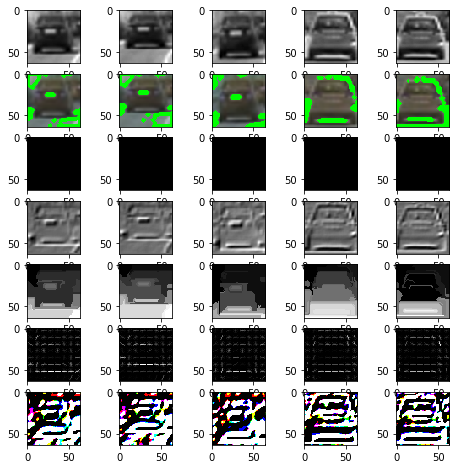

In [24]:
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 7
img=[]
#print(len(veh_img[0]))
print('Vehicles')
for i in range(5):
    img.append(veh_img[i].reshape(64,64))
for i in range(5):
    img.append(c_veh_img[i].reshape(64,64,3))
for i in range(5):
    img.append(b_veh_img[i].reshape(64,64))
for i in range(5):
    img.append(p_veh_img[i].reshape(64,64))
for i in range(5):
    img.append(s_veh_img[i].reshape(64,64))
for i in range(5):
    img.append(h_veh_img[i].reshape(64,64))
for i in range(5):
    img.append(l_veh_img[i].reshape(64,64,3))
for i in range(0, columns*rows): # for plotting all images in one image
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img[i],cmap='gray')


### Visualization of Non-Vehicles with various feature extraction methods

No Vehicles


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


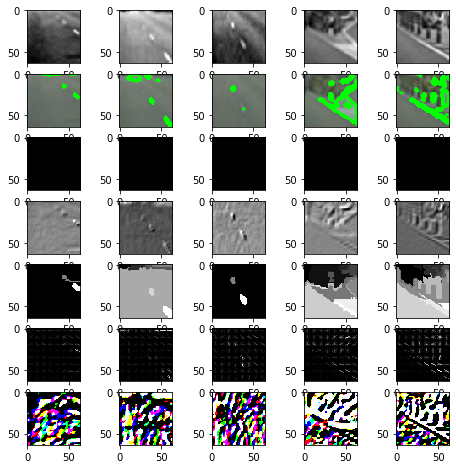

In [25]:
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 7
img=[]
print('No Vehicles')
for i in range(5):
    img.append(nonveh_img[i].reshape(64,64))
for i in range(5):
    img.append(c_nonveh_img[i].reshape(64,64,3))
for i in range(5):
    img.append(b_nonveh_img[i].reshape(64,64))
for i in range(5):
    img.append(p_nonveh_img[i].reshape(64,64))
for i in range(5):
    img.append(s_nonveh_img[i].reshape(64,64))
for i in range(5):
    img.append(h_nonveh_img[i].reshape(64,64))
for i in range(5):
    img.append(l_nonveh_img[i].reshape(64,64,3))

for i in range(0, columns*rows): # for plotting all images in one image
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img[i],cmap='gray')


### Defining a function to find accuracy of the model.

In [13]:
def acc(veh,nonveh,fex):
    X = np.vstack((veh, nonveh)).astype(np.float64) #  used to stack the sequence of input arrays vertically
    X_scaler = StandardScaler().fit(X)
    scaled_X = X_scaler.transform(X)
    y = np.hstack((np.ones(len(veh)), np.zeros(len(nonveh)))) # used to stack the sequence of input arrays horizontally
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)# to split the train and test data
    svc = LinearSVC()
    svc.fit(X_train, y_train)# to train the model using SVM
    print('Test Accuracy for '+str(fex)+' is :', round(svc.score(X_test, y_test), 4))

### Calling the accuracy function for each of the Feature Extraction Methods

### To identify the vehicles and to create frames on the vehicles identified.

178 284
(192, 320, 3)
(1764,)
[0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


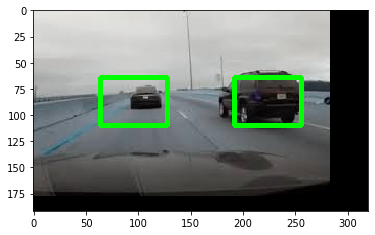

In [15]:
import math
img=cv2.imread('images.jpg') #read the test image
img1=cv2.imread('images.jpg') 
#print(img.shape)
h,w,r=img.shape #idenitfy the height, width, dimensions
print(h,w)
size=64
nh=math.ceil(h/size) #to round off the decimals to the next whole number
nw=math.ceil(w/size)
b_h=(nh*size)-h
b_w=(nw*size)-w
image = cv2.copyMakeBorder( img, 0, b_h, 0, b_w,0) #to call a function to make borders
image1= cv2.copyMakeBorder( img1, 0, b_h, 0, b_w,0)
print(image.shape)
h,w,r=image.shape
#plt.imshow(image[1000:1097,1000:1950,:])
#print(image[0][0])
#print(image[0])
#acc(hfeature_veh,hfeature_nonveh,'Histogram of Oriented Gradients')
X = np.vstack((hfeature_veh,hfeature_nonveh)).astype(np.float64) # used to stack the sequence of input arrays vertically  
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)
y = np.hstack((np.ones(len(hfeature_veh)), np.zeros(len(hfeature_nonveh)))) # used to stack the sequence of input arrays vertically
#rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, train_size=0.8) #To divide the input data into train and test data
print(X_test[0].shape)
svc = LinearSVC()
svc.fit(X_train, y_train) #to train the model using Linear SVCs
count=1
pred=svc.predict(X_test[0:10])
print(pred)
for i in range(0,127,size):
    pre=[]
    for j in range(0,w-1,size):
        hfeature,himg=hog_image(image[i:i+size,j:j+size,:])
        #print(himg.shape)
        #print(hfeature.shape)
        hfeature = X_scaler.transform(hfeature.reshape(1,-1)) #train the model using HOG features.
        pred=svc.predict(hfeature)
        pre.append(pred)
        #print(pred)
        if pred==1: #if car is found in the image, form a rectangle in the identified block.
            #print("car found")
            #image1[i:i+size,j:j+size,:]=[[[255 for k in range(3)] for j in range(size)] for i in range(size)]
            image = cv2.rectangle(image,(j,i),(j+64,i+46),(0,255,0),3)
        #print(count)
        count+=1
    #pred=svc.predict(pre)
    #print(pre)

#plt.imshow(image)
plt.imshow(image)